analizar con kmeans el archivo donde la informacion esta dispuesta por HashFunction,
csv generado por Preprocesamiento_linkedFuntion.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
import seaborn as sns

In [2]:
matriz = pd.read_csv('MatrizDataFuntions.csv')
matriz

,HashFunction,ExecutionTimeDays,InvocationsDays,http,event,orchestration,queue,storage,timer,others
0,c968871b4ef0123401975d026b85cae2ad7dad9d06ae94...,83.000000,2881.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1bc2d86badd21b18a8533d8e961e52585e5ad1fee0e2c2...,179.785714,366.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,b4d7cb9985cd8c1b7fe5ef888bbde1883929e9a5b5d2a6...,30.071429,36416.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ff612aae7b380ef81ccef063ff814354ee16018af65dc1...,0.000000,26238.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ee79840da82525548358f4b91d9fa1e550ec7af36bbe3e...,367.642857,288.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
73699,55e76e10f7305ccd9b673695e9a9c00d6a2e7a532453d1...,157.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73700,4795a4eddf26cca87a5c7c1de760fc1beefd16f866c197...,888.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73701,75e947006f189b6cce5c6516975142f29a0f169e764fde...,11966.000000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73702,42212390028151a3ab9918fd440633957a4b3b8bd3e679...,1128.000000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# matriz de funciones sin Timer
# matriz de Funciones solo Timer
matriz1 = matriz.copy()
matriz2 = matriz.copy()


cond = matriz1.loc[matriz1['timer'] >= 1].index
matriz1 = matriz1.drop(cond, inplace=False).reset_index(drop = True)

#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [26, 176, 392, 5000, 7500, 10000, 10500, 20000]
muestra1 = pd.DataFrame(matriz1.loc[indices], 
                       columns = matriz1.keys()).reset_index(drop = True) # muetras de funciones sin timer

matriz1 = matriz1.drop(indices, axis = 0).reset_index(drop = True)
matriz1

,HashFunction,ExecutionTimeDays,InvocationsDays,http,event,orchestration,queue,storage,timer,others
0,b4d7cb9985cd8c1b7fe5ef888bbde1883929e9a5b5d2a6...,30.071429,36416.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ff612aae7b380ef81ccef063ff814354ee16018af65dc1...,0.000000,26238.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dd833bb70b3a57caaa6b4e4560975d9ba5a77fd0151e13...,222.428571,64338158.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,76ac14f7c53c76012dd4880087d584cf9775ef665c676a...,64.928571,84050.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,b2d7ac575da1289b9dd714bbb9b8dc85994bfbaf4db7af...,208.214286,1394.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
53656,55e76e10f7305ccd9b673695e9a9c00d6a2e7a532453d1...,157.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53657,4795a4eddf26cca87a5c7c1de760fc1beefd16f866c197...,888.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53658,75e947006f189b6cce5c6516975142f29a0f169e764fde...,11966.000000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53659,42212390028151a3ab9918fd440633957a4b3b8bd3e679...,1128.000000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# eliminamos columna de hasgfuncion y normalizamos 
mCorr = matriz1.iloc[:, 1:]
matriz1 = matriz1.iloc[:, 1:].apply(zscore)
muestra1 = muestra1.iloc[:, 1:].apply(zscore)

matriz1 = matriz1.drop(['timer'], axis =1)
muestra1 = muestra1.drop(['timer'], axis = 1) 
mCorr = mCorr.drop(['timer'], axis = 1) 
matriz1

,ExecutionTimeDays,InvocationsDays,http,event,orchestration,queue,storage,others
0,-0.243874,0.024534,-1.144286,-0.189385,-0.346701,2.006687,-0.176154,-0.25722
1,-0.245032,0.010986,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722
2,-0.236464,85.614774,-1.144286,-0.189385,-0.346701,2.006687,-0.176154,-0.25722
3,-0.242531,0.087938,-1.144286,-0.189385,-0.346701,2.006687,-0.176154,-0.25722
4,-0.237012,-0.022083,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722
...,...,...,...,...,...,...,...,...
53656,-0.238984,-0.023937,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722
53657,-0.210825,-0.023937,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722
53658,0.215925,-0.023936,-1.144286,-0.189385,-0.346701,-0.498334,5.676850,-0.25722
53659,-0.201579,-0.023936,-1.144286,-0.189385,-0.346701,-0.498334,5.676850,-0.25722


In [7]:
# X para trabajar con el algoritmo Kmeans
X = matriz1.copy()

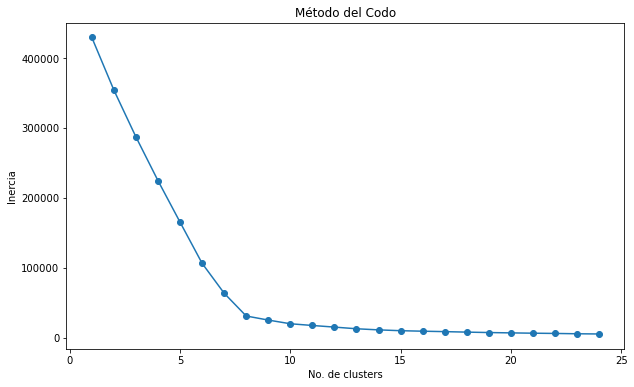

In [8]:
## Hallar el valor óptimo de K ##
# medoto del codo 
inercia = []
#inercia suma de distancias cuadradas de la muetras a su centro d cluster 
for i in range(1, 25):
    algoritmoKMeans = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmoKMeans.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmoKMeans.inertia_)

    
#Se traza la curva de la suma de errores cuadráticos
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 25)), inercia, marker='o')
plt.ion()

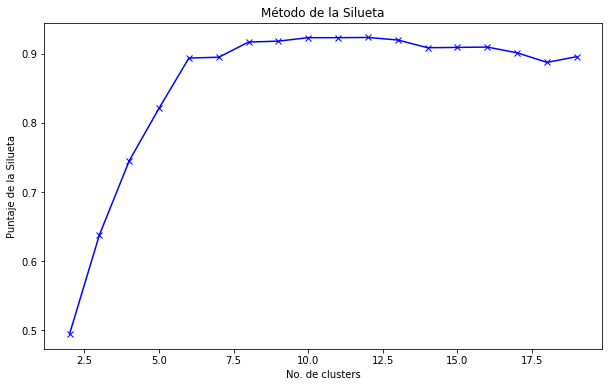

In [9]:
from sklearn.metrics import silhouette_score
silueta = []
for k in range(2, 20):
    algoritmoKMeans = KMeans(n_clusters = k, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmoKMeans.fit(X)
    labels = algoritmoKMeans.labels_
    
    silueta.append(silhouette_score(X, labels, metric = 'euclidean'))
    
plt.figure(figsize=[10,6])
plt.title('Método de la Silueta')
plt.xlabel('No. de clusters')
plt.ylabel('Puntaje de la Silueta')
plt.plot(list(range(2, 20)), silueta, 'bx-') 
plt.ion()

In [10]:
# K = 7
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmoKMeans = KMeans(n_clusters = 8, init = 'k-means++', 
                   max_iter = 300, n_init = 10)


In [11]:
#Se entrena el algoritmo
algoritmoKMeans.fit(X)

KMeans()

In [12]:
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmoKMeans.cluster_centers_, algoritmoKMeans.labels_
print (centroides)
print (etiquetas)# a que cluster pertenece cada dato del dataset 

[[-1.18838548e-01 -1.83510321e-02  8.73907347e-01 -1.89384922e-01
  -3.46700505e-01 -4.98333892e-01 -1.76154031e-01 -2.57219765e-01]
 [ 7.00846778e-02  6.79931641e-03 -1.14428607e+00 -1.89384922e-01
  -3.46700505e-01  2.00668671e+00 -1.76154031e-01 -2.57219765e-01]
 [-1.44502549e-01  1.87845990e-01 -1.14428607e+00  5.28025140e+00
  -3.46700505e-01 -4.98333892e-01 -1.76154031e-01 -2.57219765e-01]
 [-1.18197237e-01 -2.06697484e-02 -1.14428607e+00 -1.89384922e-01
   2.88433385e+00 -4.98333892e-01 -1.76154031e-01 -2.57219765e-01]
 [-1.38876949e-01 -2.10765970e-02 -1.14428607e+00 -1.89384922e-01
  -3.46700505e-01 -4.98333892e-01 -1.76154031e-01  3.88772612e+00]
 [ 2.34103885e-02 -1.56334296e-02 -1.14428607e+00 -1.89384922e-01
  -3.46700505e-01 -4.98333892e-01  5.67684995e+00 -2.57219765e-01]
 [-2.17313776e-01  1.19512635e+02 -4.71554928e-01 -1.89384922e-01
  -3.46700505e-01  1.17167985e+00 -1.76154031e-01 -2.57219765e-01]
 [ 8.47779142e+00 -2.29779305e-02 -3.54029609e-01 -1.67418511e-01
   

In [13]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra1 = muestra1.fillna(0)
muestra_prediccion = algoritmoKMeans.predict(muestra1)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 3
Muestra 1 se encuentra en el clúster: 2
Muestra 2 se encuentra en el clúster: 3
Muestra 3 se encuentra en el clúster: 0
Muestra 4 se encuentra en el clúster: 0
Muestra 5 se encuentra en el clúster: 0
Muestra 6 se encuentra en el clúster: 0
Muestra 7 se encuentra en el clúster: 0


In [14]:
cor = matriz1.corr()
cor2 = mCorr.corr()

In [15]:
matriz1['cluster'] = etiquetas
matriz1

,ExecutionTimeDays,InvocationsDays,http,event,orchestration,queue,storage,others,cluster
0,-0.243874,0.024534,-1.144286,-0.189385,-0.346701,2.006687,-0.176154,-0.25722,1
1,-0.245032,0.010986,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722,0
2,-0.236464,85.614774,-1.144286,-0.189385,-0.346701,2.006687,-0.176154,-0.25722,6
3,-0.242531,0.087938,-1.144286,-0.189385,-0.346701,2.006687,-0.176154,-0.25722,1
4,-0.237012,-0.022083,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722,0
...,...,...,...,...,...,...,...,...,...
53656,-0.238984,-0.023937,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722,0
53657,-0.210825,-0.023937,0.873907,-0.189385,-0.346701,-0.498334,-0.176154,-0.25722,0
53658,0.215925,-0.023936,-1.144286,-0.189385,-0.346701,-0.498334,5.676850,-0.25722,5
53659,-0.201579,-0.023936,-1.144286,-0.189385,-0.346701,-0.498334,5.676850,-0.25722,5


In [16]:
# para saber cantida de elementos por cluster
grupo = matriz1.groupby('cluster')
grupo['cluster'].count()

cluster
0    30229
1    10483
2     1856
3     5699
4     3305
5     1588
6        3
7      498
Name: cluster, dtype: int64

# resultado de agrupacion con funciones sin trigger timer

# grupo 1 

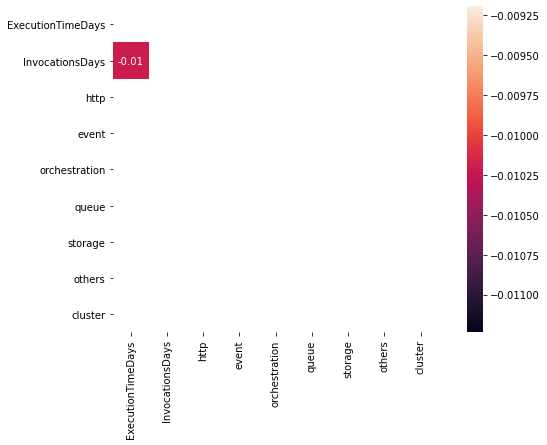

In [17]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(0).corr(), square = True, annot = True, mask = mask)


# grupo 2

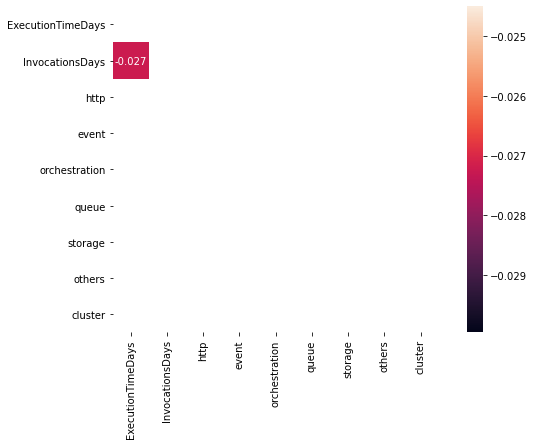

In [18]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(1).corr(), square = True, annot = True, mask = mask)

# grupo 3

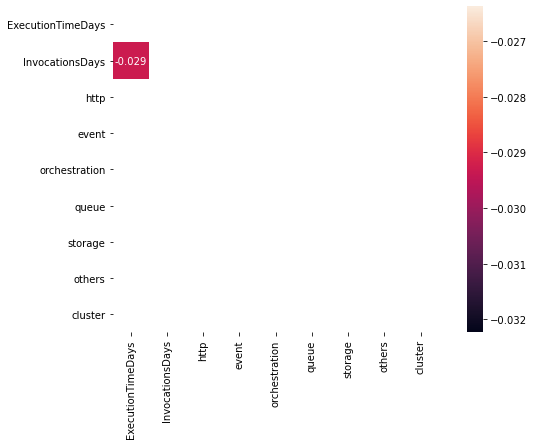

In [19]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(2).corr(), square = True, annot = True, mask = mask)

# grupo 4

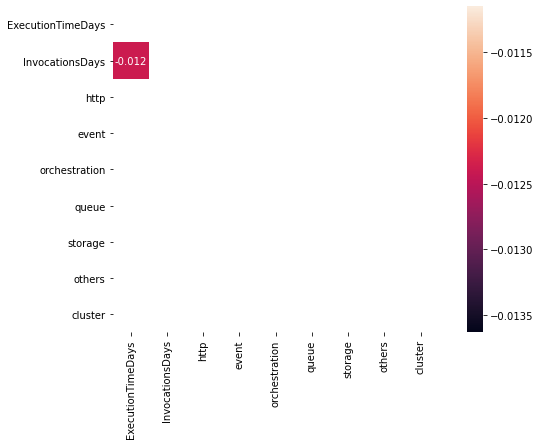

In [20]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(3).corr(), square = True, annot = True, mask = mask)

# grupo 5

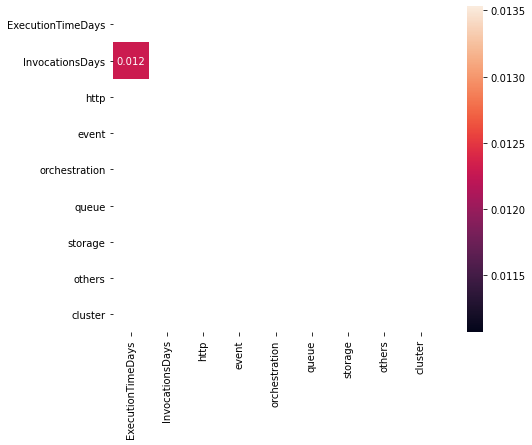

In [21]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(4).corr(), square = True, annot = True, mask = mask)

# grupo 6

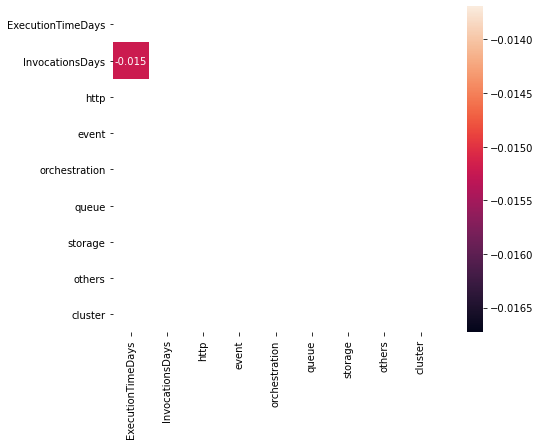

In [22]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(5).corr(), square = True, annot = True, mask = mask)

# grupo 7

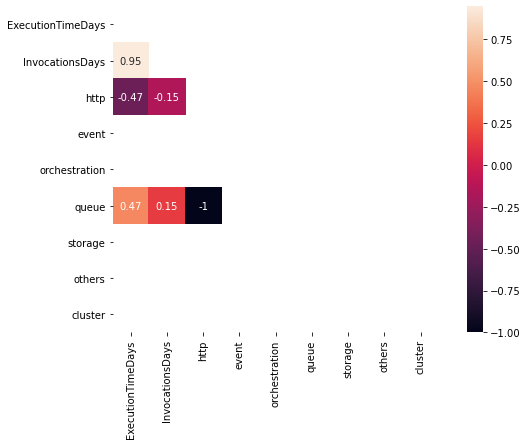

In [23]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(6).corr(), square = True, annot = True, mask = mask)

# grupo 8

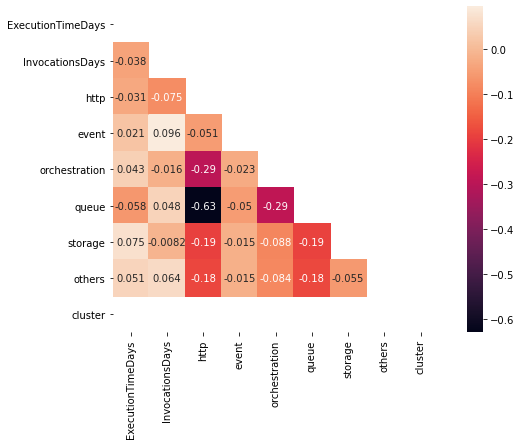

In [24]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(grupo.get_group(7).corr(), square = True, annot = True, mask = mask)

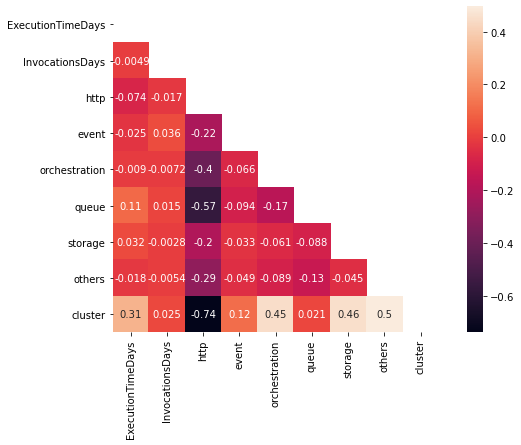

In [25]:
mask = np.zeros_like(matriz1.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(matriz1.corr(), square = True, annot = True, mask = mask)


In [29]:
#
type(grupo.get_group(7))
gCorr = mCorr

pandas.core.frame.DataFrame

# funciones con solo timer

In [3]:
matriz2 = matriz.copy()
matriz2 = matriz2[matriz2['timer'] >= 1]
matriz2.reset_index(drop=True, inplace=True)
matriz2 = matriz2.drop(['HashFunction', 'http', 'event', 'orchestration', 'queue', 'storage', 'others', 'timer'], axis =1)
matriz2

,ExecutionTimeDays,InvocationsDays
0,83.000000,2881.0
1,179.785714,366.0
2,367.642857,288.0
3,0.000000,1441.0
4,167.000000,705.0
...,...,...
20030,198590.000000,2.0
20031,157.000000,1.0
20032,461.000000,1.0
20033,157.000000,1.0


In [196]:
muestra2 = pd.DataFrame(matriz2.loc[indices], 
                       columns = matriz2.keys()).reset_index(drop = True) # muetras de funciones sin timer

matriz2 = matriz2.drop(indices, axis = 0).reset_index(drop = True)
matriz2

,ExecutionTimeDays,InvocationsDays
0,83.000000,2881.0
1,179.785714,366.0
2,367.642857,288.0
3,0.000000,1441.0
4,167.000000,705.0
...,...,...
20022,198590.000000,2.0
20023,157.000000,1.0
20024,461.000000,1.0
20025,157.000000,1.0


In [197]:

# eliminamos columna de hasgfuncion y normalizamos 
mCorr2 = matriz2.copy()
matriz2 = matriz2.apply(zscore)
muestra2 = muestra2.apply(zscore)

matriz2

,ExecutionTimeDays,InvocationsDays
0,-0.314719,0.336423
1,-0.313033,-0.091778
2,-0.309761,-0.105058
3,-0.316164,0.091251
4,-0.313255,-0.034060
...,...,...
20022,3.142902,-0.153752
20023,-0.313430,-0.153922
20024,-0.308135,-0.153922
20025,-0.313430,-0.153922


In [198]:
Y = matriz2.copy()

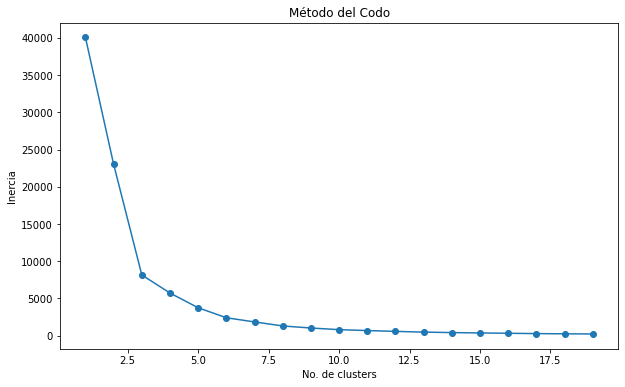

In [171]:
## Hallar el valor óptimo de K ##
# medoto del codo 
inercia2 = []
#inercia suma de distancias cuadradas de la muetras a su centro d cluster 
for i in range(1, 20):
    algoritmoKMeans = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmoKMeans.fit(Y)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia2.append(algoritmoKMeans.inertia_)

    
#Se traza la curva de la suma de errores cuadráticos
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia2, marker='o')
plt.ion()

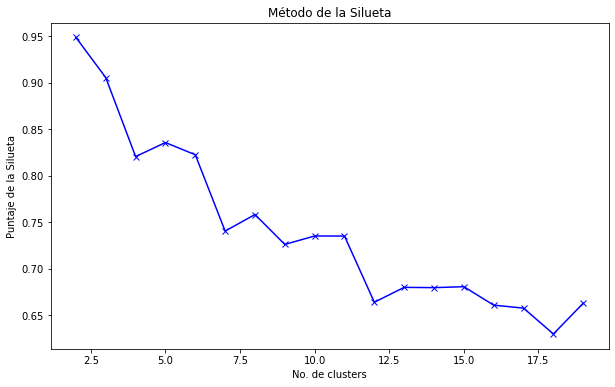

In [174]:
from sklearn.metrics import silhouette_score
silueta2 = []
for k in range(2, 20):
    algoritmoKMeans = KMeans(n_clusters = k, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmoKMeans.fit(Y)
    labels = algoritmoKMeans.labels_
    
    silueta2.append(silhouette_score(Y, labels, metric = 'euclidean'))
    
plt.figure(figsize=[10,6])
plt.title('Método de la Silueta')
plt.xlabel('No. de clusters')
plt.ylabel('Puntaje de la Silueta')
plt.plot(list(range(2, 20)), silueta2, 'bx-')
plt.ion()

In [199]:
# K = 3
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmoKMeans2 = KMeans(n_clusters = 3, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [200]:
#Se entrena el algoritmo
algoritmoKMeans2.fit(Y)

KMeans(n_clusters=3)

In [201]:
#Se obtiene los datos de los centroides y las etiquetas
centroides2, etiquetas2 = algoritmoKMeans2.cluster_centers_, algoritmoKMeans2.labels_
print (centroides2)
print (etiquetas2)# a que cluster pertenece cada dato del dataset 
type(etiquetas2)
    

[[-0.15476315 -0.06329253]
 [ 4.77512144 -0.14719893]
 [-0.31403194 12.8836512 ]]
[0 0 0 ... 0 0 0]


numpy.ndarray

In [206]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra2 = muestra2.fillna(0)
muestra_prediccion2 = algoritmoKMeans2.predict(muestra2)
for i, pred in enumerate(muestra_prediccion2):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 0
Muestra 2 se encuentra en el clúster: 0
Muestra 3 se encuentra en el clúster: 0
Muestra 4 se encuentra en el clúster: 0
Muestra 5 se encuentra en el clúster: 0
Muestra 6 se encuentra en el clúster: 0
Muestra 7 se encuentra en el clúster: 0


In [207]:
matriz2['cluster'] = etiquetas2
matriz2

,ExecutionTimeDays,InvocationsDays,cluster
0,-0.314719,0.336423,0
1,-0.313033,-0.091778,0
2,-0.309761,-0.105058,0
3,-0.316164,0.091251,0
4,-0.313255,-0.034060,0
...,...,...,...
20022,3.142902,-0.153752,1
20023,-0.313430,-0.153922,0
20024,-0.308135,-0.153922,0
20025,-0.313430,-0.153922,0


In [208]:
grupo2 = matriz2.groupby('cluster')
grupo2['cluster'].count()

cluster
0    19293
1      632
2      102
Name: cluster, dtype: int64

# grupo 1 

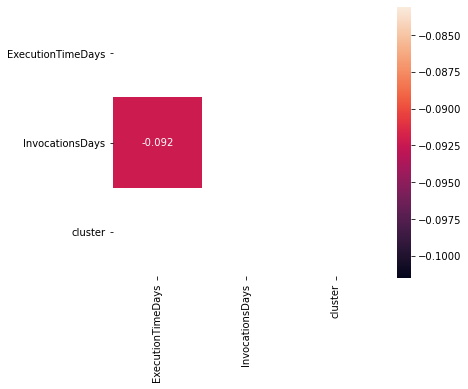

In [216]:
mask = np.zeros_like(matriz2.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(grupo2.get_group(0).corr(), square = True, annot = True, mask = mask)

# grupo 2

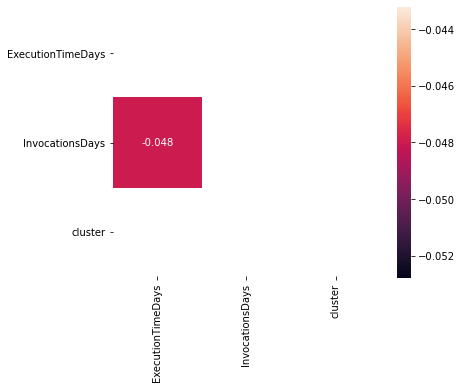

In [217]:
mask = np.zeros_like(matriz2.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(grupo2.get_group(1).corr(), square = True, annot = True, mask = mask)

# grupo 3

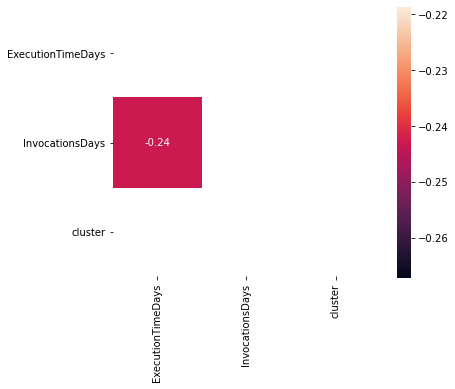

In [219]:
mask = np.zeros_like(matriz2.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(grupo2.get_group(2).corr(), square = True, annot = True, mask = mask)

<AxesSubplot:>

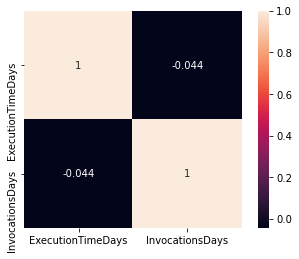

In [222]:
sns.heatmap(matriz2.drop(['cluster'], axis = 1).corr(), square = True, annot = True)

# estaditicas

In [4]:
matriz2.describe()

,ExecutionTimeDays,InvocationsDays
count,20035.000000,20035.000000
mean,18149.096936,904.735962
std,57403.058973,5872.406664
min,-2763.083333,1.000000
25%,300.107143,1.000000
50%,1428.545455,47.000000
75%,8147.428571,288.000000
max,886277.000000,86699.000000
